- Penalize large weights by adding their squared magnitude to the cost

$ J = \sum_{n=1}^N (y_n - \hat{y_n})^2 + \lambda \vert w \vert ^2$  

where $\vert w \vert ^2 = w^Tw = w_1^2 + w_2^2 + ... + w_D^2$  

- Probabilistic perspective

  - Plain squared error maximizes likelihood: $P(data|w)$
  - We are no longer maximizing this, since there are 2 terms:
    - Likelihood: $P(Y \vert X,w) = \prod_{n=1}^N \frac{1}{\sqrt{2\pi\sigma^2}}exp\{-\frac{1}{2\sigma^2}(y_n - w^T x_n)^2\}$
    - Prior: $P(w) = \frac{\lambda}{\sqrt{2\pi}}exp\{- \frac{\lambda}{2}w^T w\}$
  - Exponentiating $J$ shows that there are two Gaussians. The first is the same as before. The second is a Gaussian with $w$ as the random variable, whose mean is 0, and variance $\frac{1}{\lambda}$
    - $ exp(J) = [ \prod_{n=1}^N exp\{-(y_n - w^T x_n)^2\}] exp \{- \lambda w^T w \}$
    
### MAP - maximum a posteriori - means we maximize the posterior (in the Bayes sense) $p(W \vert data)$ 

$ J_{old} \propto - ln P(Y \vert X, w)$  
$ J_{old} \propto - ln P(Y \vert X, w) - ln P(w)$  
$ P(w \vert Y,X) = \frac{P(Y \vert X, w) P(w)}{P(Y \vert X)}$  
$ P(w \vert Y,X) = P(Y \vert X, w) P(w)$  

## Solving for w

Exercise: derive this

$J = (Y - Xw)^T (Y - Xw) + \lambda w^T w$  
$J = Y^T Y - 2 Y^T X w + w^T X^T X w + \lambda w^t w$  
$(\lambda I + X^T X) w = X^T Y$  
$w = (\lambda I + X^T X)^{-1} X^T Y$

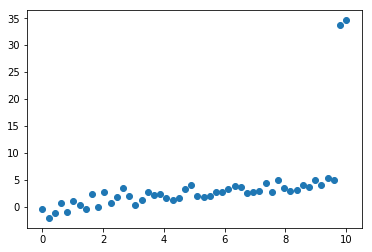

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 50
X = np.linspace(0, 10, N)
Y = 0.5 * X + np.random.randn(N)

Y[-1] += 30
Y[-2] += 30

plt.scatter(X, Y)
plt.show()

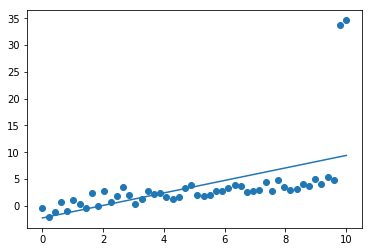

In [12]:
# MAX LIKELIHOOD LINE
X = np.stack([np.ones(N), X], axis=0).T
w_ml = np.linalg.solve(X.T.dot(X), X.T.dot(Y))
Yhat_ml = X.dot(w_ml)
plt.scatter(X[:,1], Y)
plt.plot(X[:,1], Yhat_ml)

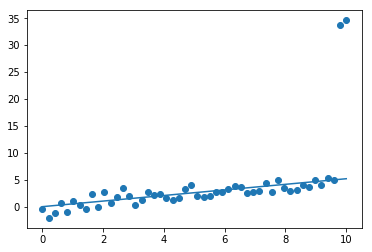

In [13]:
# MAX A POST LINE
l2 = 1000.0
w_map = np.linalg.solve(l2 * np.eye(2) + X.T.dot(X), X.T.dot(Y))
Yhat_map = X.dot(w_map)
plt.scatter(X[:,1], Y)
plt.plot(X[:,1], Yhat_map)

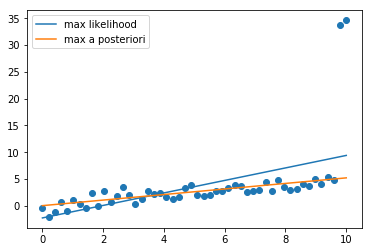

In [14]:
plt.scatter(X[:,1], Y)
plt.plot(X[:,1], Yhat_ml, label='max likelihood')
plt.plot(X[:,1], Yhat_map, label='max a posteriori')
plt.legend()